In [13]:
import torch

In [14]:
use_gpu = False
if torch.cuda.is_available():
    use_gpu = True
    print(f"You are using {torch.cuda.get_device_name()}")
else:
    use_gpu = False
    print("You are not training on GPU!")

You are using GeForce RTX 3080


In [15]:
import imageio

In [16]:
img_arr = imageio.imread("/home/dawidkubicki/AI-Projects/pytorch-fun/data/cat.jpg")

In [17]:
img_arr.shape

(549, 976, 3)

PyTorch modules dealing with image data require tensors to be laid out as C × H × W :
channels, height, and width, respectively

In [18]:
img = torch.from_numpy(img_arr)

In [19]:
img.shape

torch.Size([549, 976, 3])

In [20]:
img = img.view(3, 549, 976)

In [21]:
img.shape

torch.Size([3, 549, 976])

In [22]:
BATCH_SIZE = 3
batch = torch.zeros(BATCH_SIZE, 3, 256, 256, dtype=torch.uint8)

In [23]:
import os

data_dir = '/home/dawidkubicki/AI-Projects/pytorch-fun/data/data/p1ch4/image-cats/'
filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png']

In [24]:
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2,0,1)
    img_t = img_t[:3]
    batch[i] = img_t

#### Data normalization

In [26]:
batch = batch.float()
batch /= 255.0

#### OR we can compute mean and standard deviation 

In [28]:
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

### Let's load a CT format image

In [29]:
dir_path = '/home/dawidkubicki/AI-Projects/pytorch-fun/data/data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083'

In [30]:
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)


(99, 512, 512)

In [31]:
vol = torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol,0)

In [32]:
vol.shape

torch.Size([1, 99, 512, 512])

#### Tabular dataset

In [33]:
wine_path = '/home/dawidkubicki/AI-Projects/pytorch-fun/data/data/p1ch4/tabular-wine/winequality-white.csv'

In [37]:
import numpy as np
import csv

wine_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)

In [38]:
wine_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [40]:
col_list = next(csv.reader(open(wine_path), delimiter=';'))
wine_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [41]:
wineq = torch.from_numpy(wine_numpy)

In [42]:
wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [46]:
char_list = np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype=str)

In [47]:
char_list

array(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='<U1')

In [48]:
char2idx = {char: i for (i, char) in enumerate(char_list)}

In [49]:
char2idx

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}

In [52]:
idx2char = {key: value for (value, key) in char2idx.items()}

In [53]:
idx2char

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g'}

In [54]:
idx2char[1]

'b'

## Exercises

### Take several pictures of red, blue, and green items with your phone or other dig-ital camera (or download some from the internet, if a camera isn’t available).
   #### a Load each image, and convert it to a tensor.
   #### b For each image tensor, use the .mean() method to get a sense of how bright the image is.
   #### c Take the mean of each channel of your images. Can you identify the red, green, and blue items from only the channel averages?

In [55]:
image_dir = '/home/dawidkubicki/AI-Projects/pytorch-fun/data/cat.jpg'

In [56]:
img_a = imageio.imread("/home/dawidkubicki/AI-Projects/pytorch-fun/data/cat.jpg")

In [72]:
img_a.shape

(549, 976, 3)

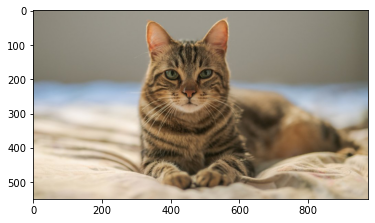

In [77]:
from PIL import Image

img = np.array(img_a)

import matplotlib.pyplot as plt

img = img.reshape(549, 976, 3)

plt.imshow(img)

In [58]:
img_t = torch.tensor(img_a, dtype=torch.float)

In [60]:
img_t.shape

torch.Size([549, 976, 3])

In [64]:
img_t = img_t.view(3, 549, 976)

In [65]:
img_t.shape

torch.Size([3, 549, 976])

In [78]:
n_channels = batch.shape[0]
for c in range(n_channels):
    mean = torch.mean(img_t[:, c])
    std = torch.std(img_t[:, c])
    img_t[:, c] = (img_t[:, c] - mean) / std

In [80]:
img_t

tensor([[[-6.0314e-01, -7.2528e-01, -1.0917e+00,  ..., -2.2964e-02,
          -3.5885e-01,  9.9178e-02],
         [ 9.3028e-01,  6.8504e-01,  1.0195e+00,  ...,  6.1816e-01,
           9.5257e-01,  8.6339e-01],
         [ 6.7312e-01,  1.1219e+00,  1.0023e+00,  ..., -1.9460e-01,
          -2.8437e-01, -7.3319e-01],
         ...,
         [ 1.2200e+02,  1.1900e+02,  1.0400e+02,  ...,  1.4500e+02,
           1.2900e+02,  1.5500e+02],
         [ 1.4800e+02,  1.3200e+02,  1.5900e+02,  ...,  1.2500e+02,
           1.4500e+02,  1.3900e+02],
         [ 1.2500e+02,  1.4500e+02,  1.3900e+02,  ...,  1.0100e+02,
           9.8000e+01,  8.3000e+01]],

        [[-1.0001e+00, -1.0917e+00, -1.5497e+00,  ..., -2.9778e-01,
          -7.8635e-01,  6.8642e-02],
         [ 7.9651e-01,  4.6210e-01,  1.0640e+00,  ...,  2.8375e-01,
           7.2963e-01,  5.9586e-01],
         [ 2.2430e-01,  8.2273e-01,  6.4320e-01,  ..., -4.9381e-01,
          -5.8358e-01, -1.0324e+00],
         ...,
         [ 2.0900e+02,  1